In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('uploaded/mission_launches.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [20]:
print(df.dtypes)

Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object


In [34]:
# Convert columns to the appropriate data type and filter out NaN values
df['Unnamed: 0.1'] = pd.to_numeric(df['Unnamed: 0.1'], errors='coerce').dropna()
df['Unnamed: 0'] = pd.to_numeric(df['Unnamed: 0'], errors='coerce').dropna()
df['Organisation'] = df['Organisation'].astype(str).dropna()
df['Location'] = df['Location'].astype(str).dropna()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dropna()
df['Detail'] = df['Detail'].astype(str).dropna()
df['Rocket_Status'] = df['Rocket_Status'].astype(str).dropna()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').dropna()
df['Mission_Status'] = df['Mission_Status'].astype(str).dropna()

print(df.head())

   Unnamed: 0.1  Unnamed: 0 Organisation   
0             0           0       SpaceX  \
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location   
0         LC-39A, Kennedy Space Center, Florida, USA  \
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                       Date                                        Detail   
0 2020-08-07 05:12:00+00:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  \
1 2020-08-06 04:01:00+00:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00+00:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00+00:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 

In [37]:
df.to_json('uploaded/mission_launches.json', orient='records')

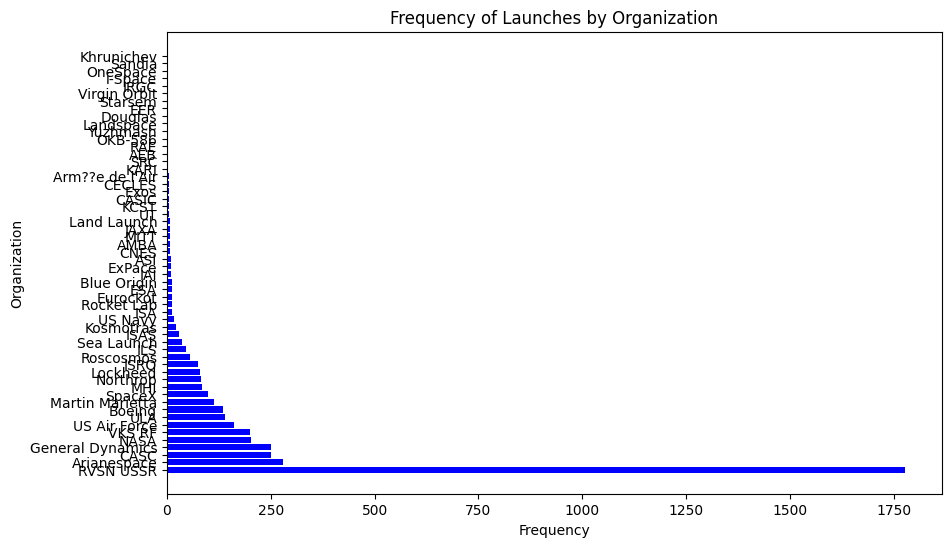

In [33]:
organization_counts = df['Organisation'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(organization_counts.index, organization_counts.values, color='b')
ax.set_xlabel('Frequency')
ax.set_ylabel('Organization')
ax.set_title('Frequency of Launches by Organization')
plt.show()

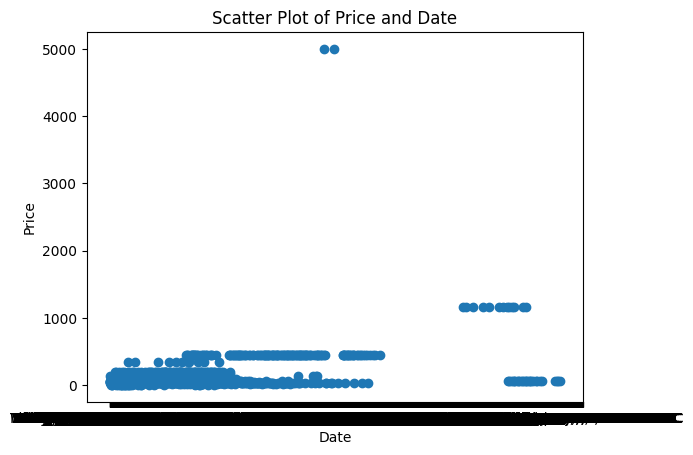

In [30]:
# convert the date column to datetime format with the corrected format string
# df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d, %Y', errors='ignore')

# df['Price'] = df['Price'].str.replace(',', '')

# Convert price to float
# df['Price'] = df['Price'].astype(float)

# create the scatter plot
plt.scatter(df['Date'], df['Price'])

# set the x-axis label to Date
plt.xlabel('Date')

# set the y-axis label to Price
plt.ylabel('Price')

# set the title of the plot
plt.title('Scatter Plot of Price and Date')

# display the plot
plt.show()